In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sms-spam-collection-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F483%2F982%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240220%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240220T135011Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D85645534b0a8643dffea314f2aa79e6cb3d2cc3dc381b97744f4c96446dfe014f72cf1481f67ea4bb83263a297673462b5897e5287d4318a352484b16bee779c5ddd9cc5f8ca164aff18c111593990f7b7c48e78f7e850938ffcbfd7570737bb924363cc9b4b2709a0f6e8460720adb59e59f391cdf9668895c1eb78ee21faeaff473f35a028da244a89560f49f0af41b4947764b4610253c439a715650761f9ee916bbc3df49f351c9b4e00f792431680bd5c1f5ce02ecfdd329c75bd083ba71bbeb7ffe5beff48098f799b0078015b900469b0c1f7fe1c7f72eab28fa61bf85d29c01dfd05179599742ca425dbd844734d3809a215ae5c82429c3905f415da'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [17]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## We are import libraries from the Sci Kit Learn
## Ploting Libraries

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## We are ploting using seaborn

In [19]:
def heat_map(cm):
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

## Reading Data from csv file using pandas

In [ ]:
data=pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',encoding='latin1')
X=data['v2']
Y=data.v1

## Split the data for Testing and Traing

In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(X,Y,random_state=42,test_size=.2)

## Creating a model using Naive Bayes and use Vectorizer to transform the data

In [ ]:
model=Pipeline([('vectorizer',TfidfVectorizer()),('classifier',MultinomialNB())])

## Fit the model

In [ ]:
model.fit(x_tr,y_tr)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

## Find the predicted labels and find accuracy and confusion matrix

In [ ]:
y_pr=model.predict(x_te)
print('Accuracy_Score',accuracy_score(y_te,y_pr))
print('Confusion_Matrix',confusion_matrix(y_te,y_pr))

Accuracy_Score 0.9623318385650225
Confusion_Matrix [[965   0]
 [ 42 108]]


## Ploting

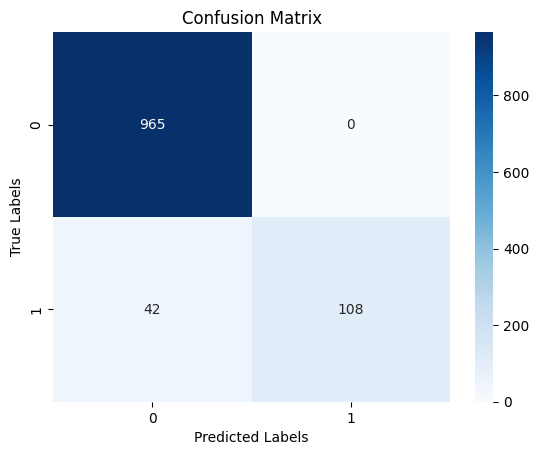

In [ ]:
heat_map(confusion_matrix(y_te,y_pr))